In [94]:
!pip install scikit-surprise


  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163751 sha256=b9ae0e1260f94c8e54ef5000cd83b8a26425845fd82b9eb25b1027fa21b4ed8e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [143]:

import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy


In [144]:

# Load the MovieLens 100K dataset
# Replace 'path_to_ratings.csv' with the actual path to your ratings.csv file

# Load the MovieLens 100K dataset
# Replace 'path_to_ratings.csv' with the actual path to your ratings.csv file
ratings_path = '/content/rating.csv'
movies_path = '/content/movie.csv'

ratings = pd.read_csv(ratings_path)
movies = pd.read_csv(movies_path)

# Merge ratings with movie information
merged_ratings = pd.merge(ratings, movies[['movieId', 'title']], on='movieId')

# Define the Reader and the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_ratings[['userId', 'movieId', 'rating']], reader)


In [145]:

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build the collaborative filtering model using SVD
model = SVD()

# Train the model
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


RMSE: 0.8540
Root Mean Squared Error (RMSE): 0.8540129614543968


In [146]:

# Function to get movie recommendations for a user
def get_movie_recommendations(user_id, top_n=10):
    user_movies = merged_ratings[merged_ratings['userId'] == user_id]['movieId']
    movies_to_predict = list(set(merged_ratings['movieId']) - set(user_movies))

    # Generate predictions for movies not yet rated by the user
    test_data = [(user_id, movie_id, 3) for movie_id in movies_to_predict]
    predictions = model.test(test_data)

    # Get top recommendations
    top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

    # Get movie names and predicted ratings for recommendations
    movie_names = [merged_ratings.loc[merged_ratings['movieId'] == pred.iid, 'title'].iloc[0] for pred in top_recommendations]
    predicted_ratings = [pred.est for pred in top_recommendations]

    return movie_names, predicted_ratings


In [147]:

# Example: Get recommendations for user with userId = 1
user_id_to_recommend = 1
recommendations, predicted_ratings = get_movie_recommendations(user_id_to_recommend)
print(f"\nTop 5 movie recommendations for user {user_id_to_recommend}:")
for i, (movie, rating) in enumerate(zip(recommendations, predicted_ratings), 1):
    print(f"{i}. {movie} - Predicted Rating: {rating}")


Top 5 movie recommendations for user 1:
1. Tampopo (1985) - Predicted Rating: 4.563571414469873
2. Braveheart (1995) - Predicted Rating: 4.538156632439443
3. To Be or Not to Be (1942) - Predicted Rating: 4.4935336538738175
4. Thin Blue Line, The (1988) - Predicted Rating: 4.453000055053982
5. Inherit the Wind (1960) - Predicted Rating: 4.44855405531581
6. Notorious (1946) - Predicted Rating: 4.444779448618824
7. Palm Beach Story, The (1942) - Predicted Rating: 4.4415954057135405
8. Anne Frank Remembered (1995) - Predicted Rating: 4.427334528425446
9. Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964) - Predicted Rating: 4.416034174629159
10. Laura (1944) - Predicted Rating: 4.399080938945565


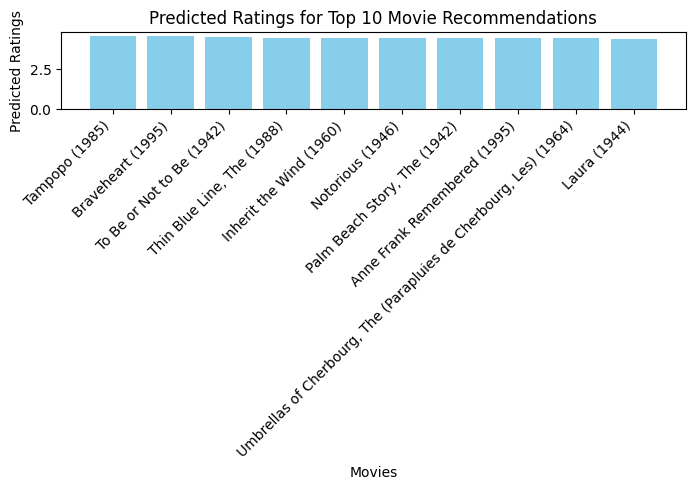

In [148]:
import matplotlib.pyplot as plt

# Visualization: Bar chart for predicted ratings
plt.figure(figsize=(7, 5))
plt.bar(recommendations, predicted_ratings, color='skyblue')
plt.xlabel('Movies')
plt.ylabel('Predicted Ratings')
plt.title(f'Predicted Ratings for Top {len(recommendations)} Movie Recommendations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [155]:

# Example: Get recommendations for user with userId = 1
user_id_to_recommend = 2
recommendations, predicted_ratings = get_movie_recommendations(user_id_to_recommend)
print(f"\nTop 5 movie recommendations for user {user_id_to_recommend}:")
for i, (movie, rating) in enumerate(zip(recommendations, predicted_ratings), 1):
    print(f"{i}. {movie} - Predicted Rating: {rating}")


Top 5 movie recommendations for user 2:
1. Saving Private Ryan (1998) - Predicted Rating: 5
2. Wallace & Gromit: The Wrong Trousers (1993) - Predicted Rating: 4.973222356747032
3. Touch of Evil (1958) - Predicted Rating: 4.943441901141572
4. Rebecca (1940) - Predicted Rating: 4.922749124611148
5. Shawshank Redemption, The (1994) - Predicted Rating: 4.917113336284242
6. Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948) - Predicted Rating: 4.9000963755650195
7. Charade (1963) - Predicted Rating: 4.88973711694255
8. Dark Knight, The (2008) - Predicted Rating: 4.887138456134203
9. Notorious (1946) - Predicted Rating: 4.871789742675543
10. Laura (1944) - Predicted Rating: 4.868118730649017


<ipython-input-156-062f7546604d>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


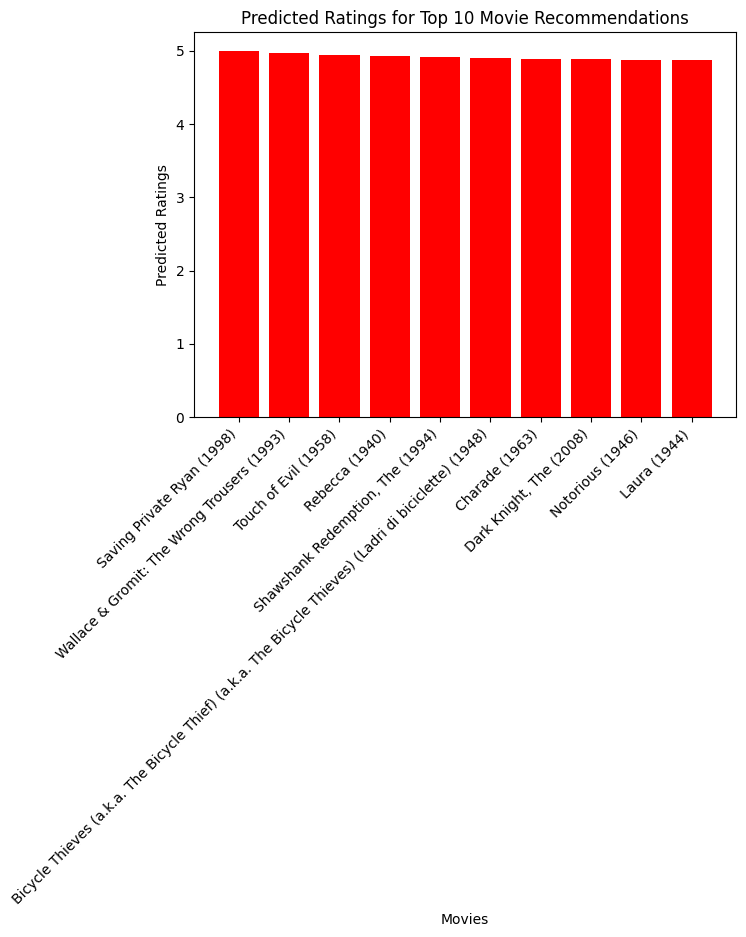

In [156]:
import matplotlib.pyplot as plt

# Visualization: Bar chart for predicted ratings
plt.figure(figsize=(7, 5))
plt.bar(recommendations, predicted_ratings, color='red')
plt.xlabel('Movies')
plt.ylabel('Predicted Ratings')
plt.title(f'Predicted Ratings for Top {len(recommendations)} Movie Recommendations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [157]:

# Example: Get recommendations for user with userId = 1
user_id_to_recommend = 6
recommendations, predicted_ratings = get_movie_recommendations(user_id_to_recommend)
print(f"\nTop 5 movie recommendations for user {user_id_to_recommend}:")
for i, (movie, rating) in enumerate(zip(recommendations, predicted_ratings), 1):
    print(f"{i}. {movie} - Predicted Rating: {rating}")


Top 5 movie recommendations for user 6:
1. Shawshank Redemption, The (1994) - Predicted Rating: 4.754078303637415
2. Thin Blue Line, The (1988) - Predicted Rating: 4.703263033302724
3. City of God (Cidade de Deus) (2002) - Predicted Rating: 4.68652156405925
4. To Be or Not to Be (1942) - Predicted Rating: 4.684313238103664
5. Matewan (1987) - Predicted Rating: 4.674721404717886
6. Pianist, The (2002) - Predicted Rating: 4.664390689937103
7. Godfather, The (1972) - Predicted Rating: 4.6558788534711315
8. Usual Suspects, The (1995) - Predicted Rating: 4.654554243304602
9. Sleuth (1972) - Predicted Rating: 4.653696213402337
10. Wallace & Gromit: The Wrong Trousers (1993) - Predicted Rating: 4.650574865591747


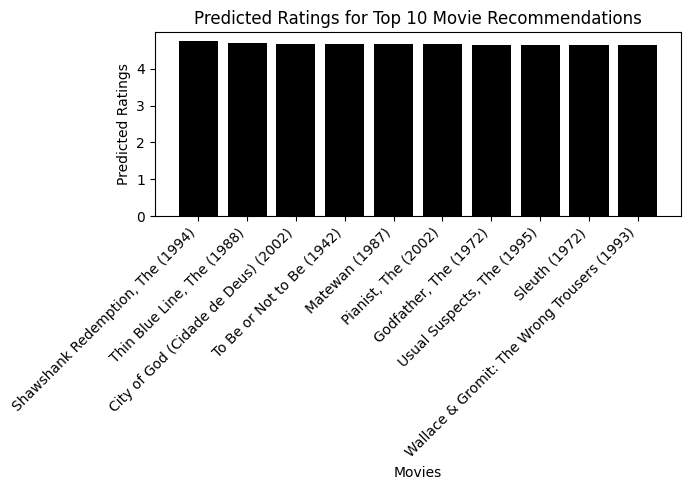

In [158]:
import matplotlib.pyplot as plt

# Visualization: Bar chart for predicted ratings
plt.figure(figsize=(7, 5))
plt.bar(recommendations, predicted_ratings, color='black')
plt.xlabel('Movies')
plt.ylabel('Predicted Ratings')
plt.title(f'Predicted Ratings for Top {len(recommendations)} Movie Recommendations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()